##WeatherPY

Analysis: 

Observed Trend 1: Temperature is highest near the equator.Some more interesting notes is that there are not as many locations past the latitude of -50, which is south of the equator, as there are North fo the equator. But the general trend is an upside down parabola in shape. With the highest points at the equator and the lowest closest to the north. Perhaps partially the reason for this could be that it is winter in the northern hemisphere and summer in the southern hemisphere, so it should be generally warmer for the Southern hemisphere.
Observed Trend 2: Cloudiness really has no meaning with latitude.Nor does humidity.
Observed Trend 3: Wind seems to have higher speeds in higher latitudes. With the lowest wind speeds being close to -10 latitude. 


In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import requests as req
import random 
from faker import Faker

app_id = "98e3ccea11f09b110709f20f639dc7e9"
weather_url = "http://api.openweathermap.org/data/2.5/weather?"


##Perform API Calls

In [64]:
# Create a random list of 500 longitude and latitude coordinates. 
#In this case, I pip-installed fake-factory to get a random number of latitude and longitude coordinates
fake = Faker()
# Create variable for loop of array
# Create array 
dataX= []
# Use the Open Weather API  to gather data into a list
x = 0
while True:
    #Get latitude nd longitude coordinates using Faker
    lat = fake.latitude()
    lng = fake.longitude()
    #input url
    query_url = weather_url + "lat=" + str(lat) + "&lon=" + str(lng) + "&units=imperial" + "&APPID=" + app_id
    weather_response = req.get(query_url)
    weather_json = weather_response.json()
    city_name = str(weather_json['name'])
    city_id = str(weather_json['id'])
    city_temp = str(weather_json['main']['temp'])
    city_hum = str(weather_json['main']['humidity'])
    city_cloud = str(weather_json['clouds']['all'])
    city_wind = str(weather_json['wind']['speed'])
    # Make sure latitude and longitude actually has a name to the location, append it to the dataX array    
    if city_name != "":
        # data, index, columns, dtype, copy
        # if ctry_id !str(weather_json['sys']['country'])= 
        
        dataX.append([city_name, city_id, lat, lng, city_temp, city_hum, city_cloud, city_wind, query_url])
        x +=1
    #Do this for 500 locations
    if x == 500:
        break
#Create a dataframe with the information
weather_df = pd.DataFrame(dataX, columns = ["city_name","city_id","lat", "lng", "city_temp", "city_hum", "cloudiness", "city_wind", "url"])
weather_df.head()

,city_name,city_id,lat,lng,city_temp,city_hum,cloudiness,city_wind,url
0,Dhidhdhoo,1337612,7.4449475,72.345184,82.87,100,68,7.4,http://api.openweathermap.org/data/2.5/weather...
1,Waterfall,941812,-29.317115,30.857684,56,99,92,2.71,http://api.openweathermap.org/data/2.5/weather...
2,Snow Hill,4492329,35.4317225,-77.713598,52.99,66,1,4.7,http://api.openweathermap.org/data/2.5/weather...
3,Andovoranto,1076227,-19.7018275,50.136859,82.46,97,92,9.64,http://api.openweathermap.org/data/2.5/weather...
4,Utrik,7306518,12.0676775,170.053641,78.55,100,80,22.5,http://api.openweathermap.org/data/2.5/weather...


In [182]:
#Save dataframe to a csv file 
weather_df.to_csv("weather_df.csv", encoding="utf-8", index=False)
# Now that the dataframe has been saved, lets use this information instead of uploading openweather all the time. 
weather_data = pd.read_csv("weather_df.csv")
#It should be the same data as before, check and see if there are any duplicates
clean_weather_df = weather_data.drop_duplicates()
clean_weather_df.count()


city_name     500
city_id       500
lat           500
lng           500
city_temp     500
city_hum      500
cloudiness    500
city_wind     500
url           500
dtype: int64

In [183]:
#Create variables with the dataframe, make sure they are all integers instead of floats, otherwise the graphs are messy.
lat = [int(i) for i in clean_weather_df['lat']]
tempF = [int(i) for i in clean_weather_df['city_temp']]
humid = [int(i) for i in clean_weather_df['city_hum']]
cloud = [int(i) for i in clean_weather_df['cloudiness']]
wind = [int(i) for i in clean_weather_df['city_wind']]

## Latitude VS. Temperature Plot

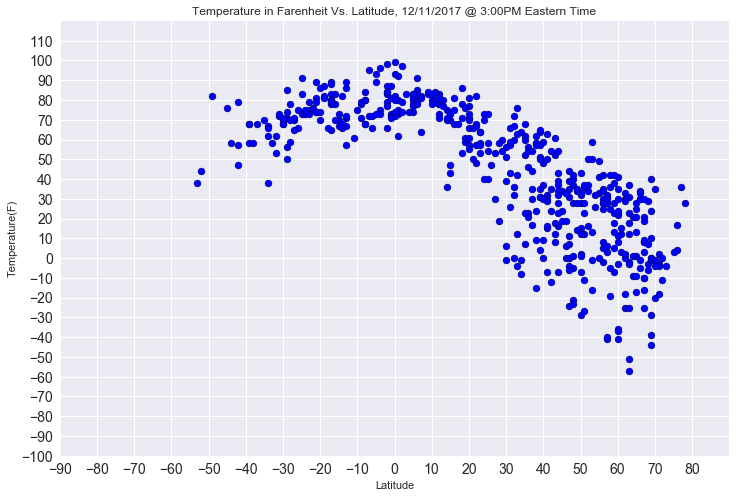

In [184]:
# Plot out Temperature (F) vs. Latitude
#Set plot with seaborn
sns.set()
#Set figure size
plt.figure(figsize = (12,8))
x = lat
y = tempF
temp_lat = plt.scatter(x,y,facecolors='blue', edgecolors = 'black')
#Add labels to the x and y axes
plt.title("Temperature in Farenheit Vs. Latitude, 12/11/2017 @ 3:00PM Eastern Time")
plt.xlabel("Latitude")
plt.ylabel("Temperature(F)")
#Set the upper and lower limits of our x and y axis
plt.ylim(-100,120)
plt.xlim(-90,90)
plt.xticks(np.arange(-90,90,10), size = 14)
plt.yticks(np.arange(-100,120,10),size = 14)

# Save Figure
plt.savefig("Fig1.png")

plt.show()

##Latitude Vs Humidity Plot

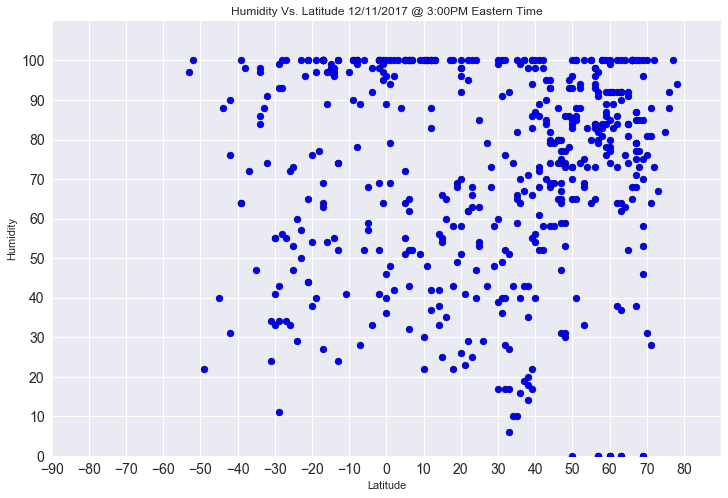

In [177]:
#Plot out Humidity (%) vs. Latitude

plt.figure(figsize = (12,8))
hum_lat = plt.scatter([lat],[humid],marker='o',facecolors='blue',edgecolors='black')

 
#Add labels to the x and y axes
plt.title("Humidity Vs. Latitude 12/11/2017 @ 3:00PM Eastern Time")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
#Set the upper and lower limits of our x and y axis
plt.ylim(0,110)
plt.xlim(-90,90)
plt.xticks(np.arange(-90,90,10), size = 14)
plt.yticks(np.arange(0,110,10),size = 14)

plt.show()
plt.savefig("Fig2.png")

##Latitude Vs. Cloudiness Plot

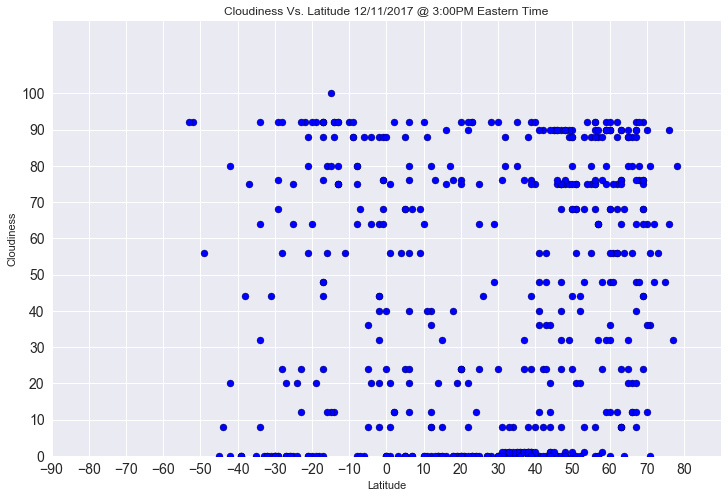

In [178]:
# Plot out Cloudiness (%) vs. Latitude

plt.figure(figsize = (12,8))

temp_lat = plt.scatter([lat],[cloud],marker='o',facecolors='blue',edgecolors='black')
#Add labels to the x and y axes
plt.title("Cloudiness Vs. Latitude 12/11/2017 @ 3:00PM Eastern Time")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
#Set the upper and lower limits of our x and y axis
plt.ylim(0,120)
plt.xlim(-90,90)
plt.xticks(np.arange(-90,90,10), size = 14)
plt.yticks(np.arange(0,110,10),size = 14)
plt.show()
plt.savefig("Fig3.png")

##Latitude Vs Wind Speed Plot

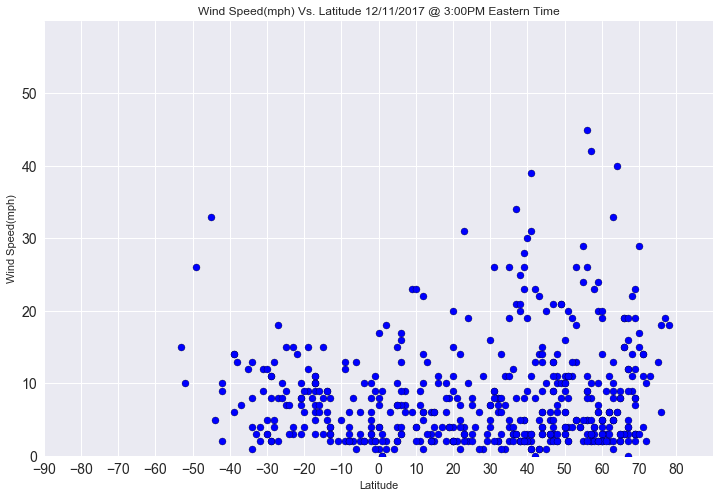

In [179]:
#Plot out Wind Speed (mph) vs. Latitude
plt.figure(figsize = (12,8))
temp_lat = plt.scatter([lat],[wind],marker='o',facecolors='blue',edgecolors='black')
#Add labels to the x and y axes
plt.title("Wind Speed(mph) Vs. Latitude 12/11/2017 @ 3:00PM Eastern Time")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
#Set the upper and lower limits of our x and y axis
plt.ylim(0,60)
plt.xlim(-90,90)
plt.xticks(np.arange(-90,90,10), size = 14)
plt.yticks(np.arange(0,60,10),size = 14)

plt.show()
plt.savefig("Fig4.png")